In [1]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from catboost import CatBoostRegressor
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import (
    AdaBoostRegressor,
    ExtraTreesRegressor,
    RandomForestRegressor,
    GradientBoostingRegressor,
    VotingRegressor,
    StackingRegressor
)

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import data from a CSV file named 'laptop_data.csv' into a DataFrame
laptop_df = pd.read_csv('laptop_data.csv')

# Display the first few rows of the DataFrame to get an initial look at the data
laptop_df.head(10)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
5,5,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,21312.0000
6,6,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,114017.6016
7,7,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,61735.5360
8,8,Asus,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows 10,1.3kg,79653.6000
9,9,Acer,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,41025.6000


In [4]:
# Get the number of rows and columns in the DataFrame
laptop_df.shape

(1303, 12)

In [5]:
# Display a concise summary of the DataFrame, including the data types of each column and non-null counts
laptop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [6]:
# Count the number of duplicate rows in the DataFrame
laptop_df.duplicated().sum()

0

In [7]:
# Count the number of missing (NaN) values in each column of the DataFrame
laptop_df.isna().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [8]:
# Drop the column named 'Unnamed: 0' from the DataFrame
# The 'inplace=True' parameter modifies the DataFrame directly without returning a new one
laptop_df.drop(columns='Unnamed: 0', inplace=True)

In [9]:
# Display the first few rows of the DataFrame to check the changes made (such as dropping a column)
laptop_df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


### EDA

#### Price

In [10]:
laptop_df['Price'].unique()

array([ 71378.6832,  47895.5232,  30636.    , 135195.336 ,  96095.808 ,
        21312.    , 114017.6016,  61735.536 ,  79653.6   ,  41025.6   ,
        20986.992 ,  18381.0672, 130001.6016,  26581.392 ,  67260.672 ,
        80908.344 ,  39693.6   , 152274.24  ,  26586.72  ,  52161.12  ,
        10224.432 ,  53226.72  ,  13746.24  ,  43636.32  ,  35111.52  ,
        22305.1392,  58554.72  ,  42624.    ,  69157.44  ,  47738.88  ,
        13053.0672,  10602.72  ,  23389.92  ,  99580.32  ,  53173.44  ,
        13266.72  ,  19553.76  ,  26037.4032,  46833.12  ,  20725.92  ,
        79866.72  ,  27864.9072,  36336.96  ,  75604.32  ,  19660.32  ,
        69210.72  ,  34045.92  ,  24828.48  ,  16996.32  ,  44808.48  ,
        21231.5472,  58767.84  ,  20459.52  ,  40908.384 ,  31232.2032,
       130482.72  ,  22111.2   ,  31914.72  ,  50136.48  ,  36763.2   ,
       105654.24  ,  23373.4032,  12201.12  ,  29250.72  ,  50562.72  ,
        58021.92  ,  50882.4   ,  46353.6   ,  58341.6   ,  2765

<Axes: xlabel='Price', ylabel='Density'>

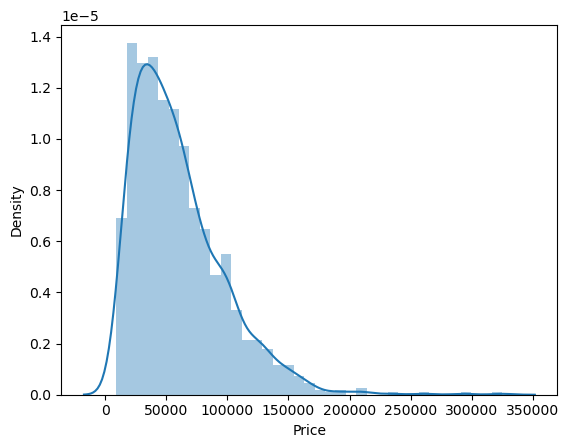

In [11]:
sns.distplot(laptop_df['Price'])

#### Company

In [12]:
# Retrieve the unique values in the 'Company' column of the DataFrame
# This is useful for understanding the different brands or manufacturers present in the dataset
laptop_df['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [13]:
# Count the number of occurrences of each unique value in the 'Company' column
# This helps in understanding the distribution of laptop brands or manufacturers in the dataset
laptop_df['Company'].value_counts()

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

<Axes: xlabel='Company'>

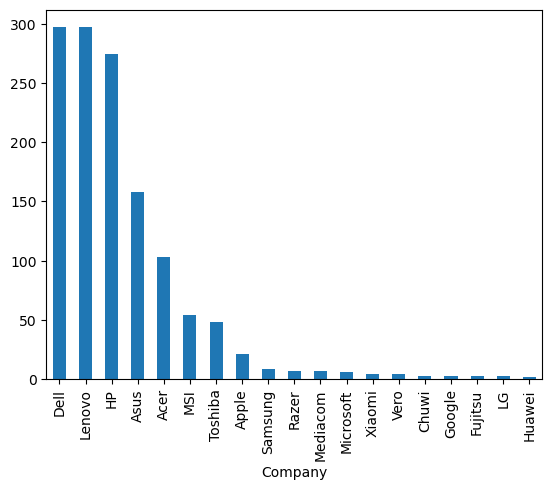

In [14]:
laptop_df['Company'].value_counts().plot(kind='bar')

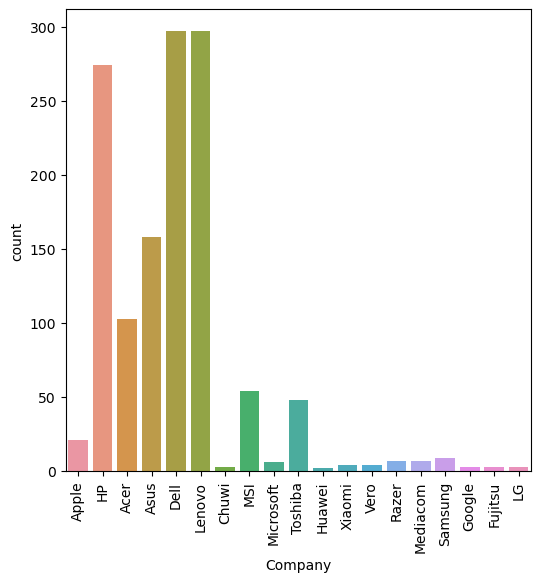

In [15]:
# Set the size of the figure for the plot to 6x6 inches
plt.figure(figsize=(6,6))

# Create a count plot for the 'Company' column using seaborn
# This plot shows the number of laptops for each company
sns.countplot(x='Company', data=laptop_df)

# Rotate the x-axis labels by 90 degrees for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()

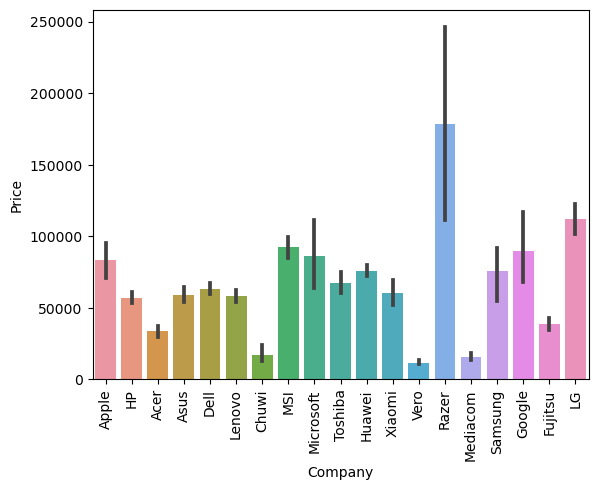

In [16]:
# Create a bar plot showing the relationship between 'Company' and 'Price' using seaborn
# The x-axis represents laptop companies, and the y-axis represents the price of laptops
sns.barplot(x=laptop_df['Company'], y=laptop_df['Price'])

# Rotate the x-axis labels vertically for better readability
plt.xticks(rotation='vertical')

# Display the plot
plt.show()

#### TypeName

In [17]:
laptop_df['TypeName'].unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

In [18]:
laptop_df['TypeName'].value_counts()

TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: count, dtype: int64

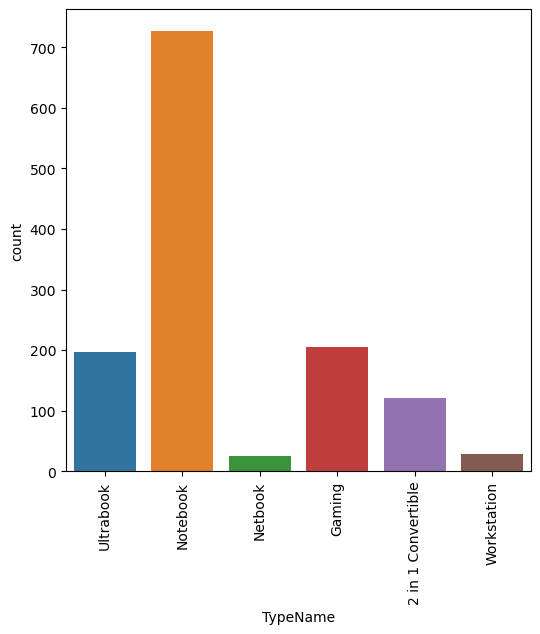

In [19]:
plt.figure(figsize=(6,6))
sns.countplot(x='TypeName',data=laptop_df)
plt.xticks(rotation=90)
plt.show()

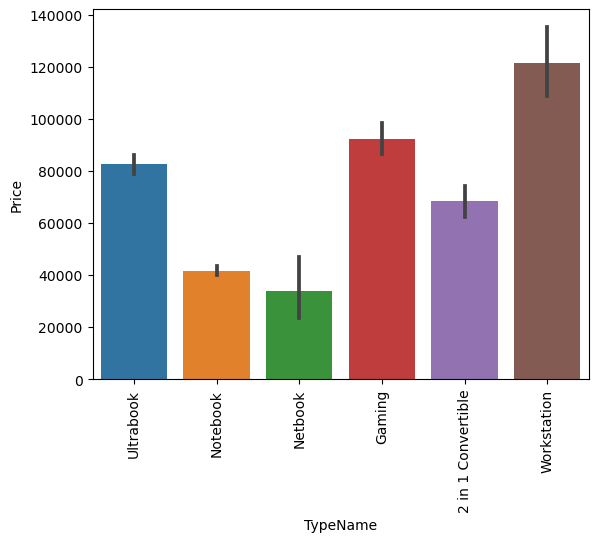

In [20]:
# Create a bar plot showing the relationship between 'TypeName' and 'Price' using seaborn
# The x-axis represents the type of laptop (e.g., gaming, ultrabook), and the y-axis represents the price of laptops
sns.barplot(x=laptop_df['TypeName'], y=laptop_df['Price'])

# Rotate the x-axis labels vertically for better readability
plt.xticks(rotation='vertical')

# Display the plot
plt.show()

#### Inches

In [21]:
laptop_df['Inches'].unique()

array([13.3, 15.6, 15.4, 14. , 12. , 11.6, 17.3, 10.1, 13.5, 12.5, 13. ,
       18.4, 13.9, 12.3, 17. , 15. , 14.1, 11.3])

In [22]:
laptop_df['Inches'].value_counts()

Inches
15.6    665
14.0    197
13.3    164
17.3    164
12.5     39
11.6     33
12.0      6
13.5      6
13.9      6
12.3      5
10.1      4
15.4      4
15.0      4
13.0      2
18.4      1
17.0      1
14.1      1
11.3      1
Name: count, dtype: int64

<Axes: xlabel='Inches', ylabel='Density'>

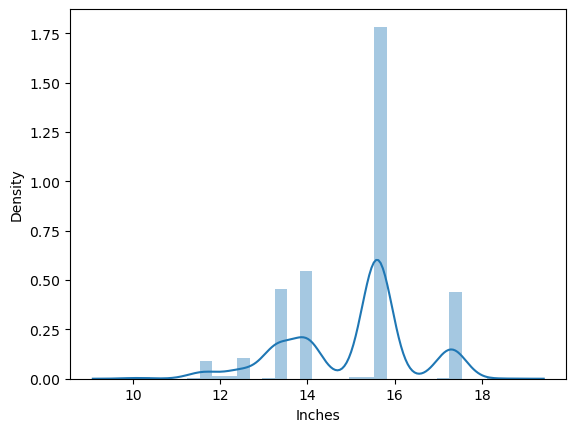

In [23]:
# Plot a distribution plot (histogram with a kernel density estimate) for the 'Inches' column
# This shows the distribution of laptop screen sizes in inches
sns.distplot(laptop_df['Inches'])

<Axes: xlabel='Inches', ylabel='Price'>

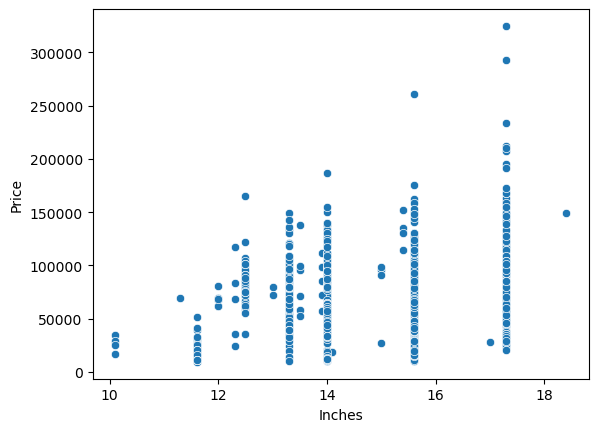

In [24]:
# Create a scatter plot to visualize the relationship between laptop screen size ('Inches') and price ('Price')
# Each point represents a laptop, with its position indicating its screen size and price
sns.scatterplot(x=laptop_df['Inches'], y=laptop_df['Price'])

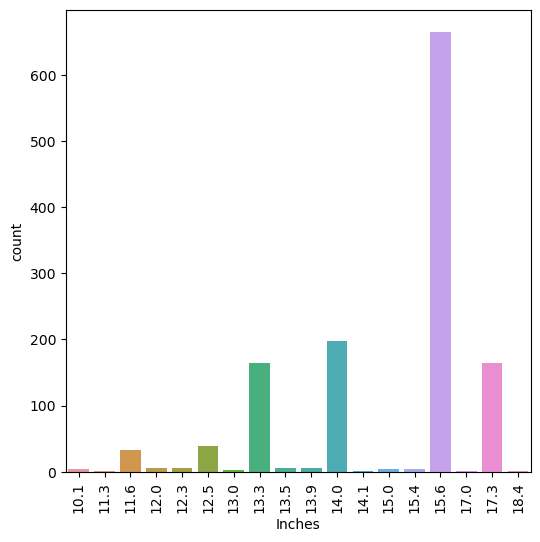

In [25]:
plt.figure(figsize=(6,6))
sns.countplot(x='Inches',data=laptop_df)
plt.xticks(rotation=90)
plt.show()

#### ScreenResolution

In [26]:
laptop_df['ScreenResolution'].unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

In [27]:
laptop_df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

<Axes: xlabel='ScreenResolution'>

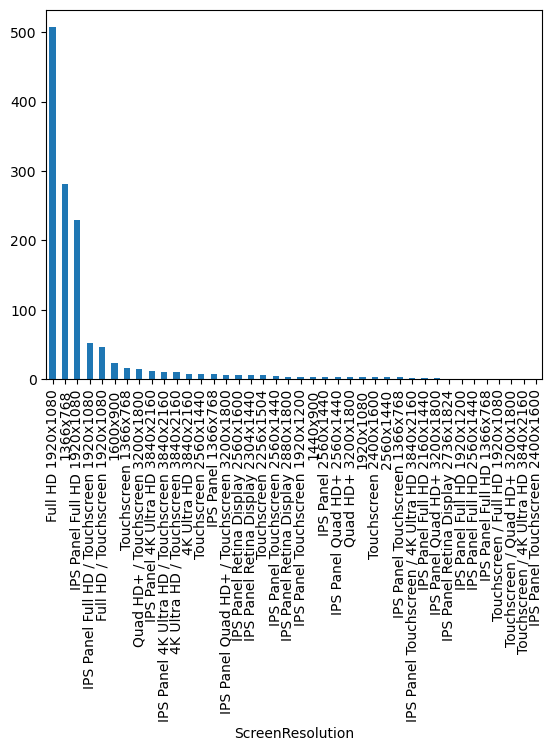

In [28]:
laptop_df['ScreenResolution'].value_counts().plot(kind='bar')

In [29]:
# From the given ScreenResolution column we are finding out the given laptop is touch screen or not
laptop_df['Touchscreen'] = laptop_df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [30]:
laptop_df.sample(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
1202,Dell,2 in 1 Convertible,15.6,Full HD / Touchscreen 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Intel UHD Graphics 620,Windows 10,2kg,68464.8000,1
490,Lenovo,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Nvidia GeForce 940MX,Windows 10,2.3kg,53918.8272,0
823,MSI,Gaming,15.6,Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8GB,256GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.4kg,63882.7200,0
1019,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.43kg,118761.1200,0
706,Acer,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,53226.7200,1
114,Dell,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.21kg,86793.1200,0
1163,Lenovo,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,8GB,1TB HDD,Intel HD Graphics 520,Windows 10,2.2kg,24455.5200,0
71,Dell,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,256GB SSD,AMD Radeon 530,Windows 10,1.4kg,50882.4000,0
400,Lenovo,Notebook,15.6,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4GB,1TB HDD,Intel HD Graphics 500,Windows 10,2.2kg,16303.6800,0
215,Dell,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,256GB SSD,AMD Radeon 530,Windows 10,1.4kg,49650.5664,0


<Axes: xlabel='Touchscreen'>

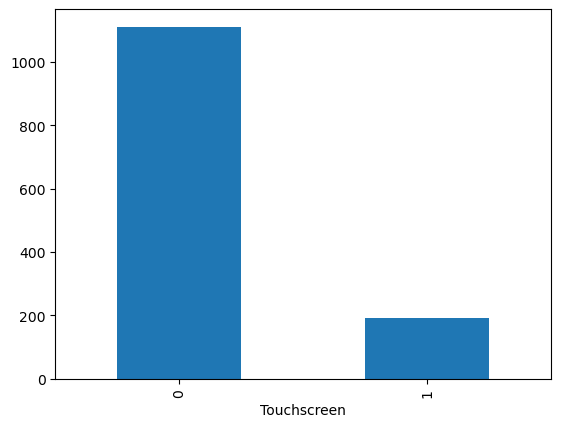

In [31]:
laptop_df['Touchscreen'].value_counts().plot(kind='bar')

<Axes: xlabel='Touchscreen', ylabel='Price'>

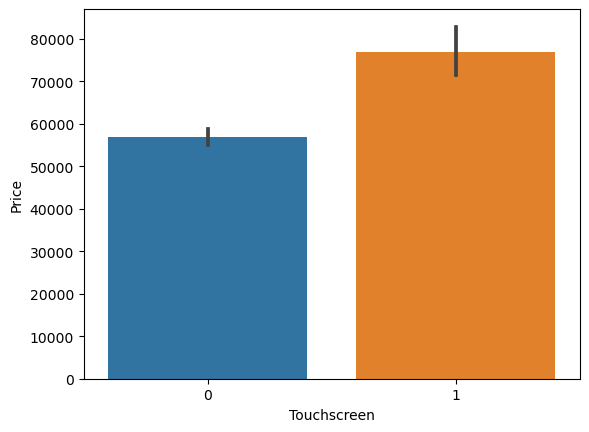

In [32]:
sns.barplot(x=laptop_df['Touchscreen'],y=laptop_df['Price'])

In [33]:
# From the given ScreenResolution column we are finding out the given laptop has IPS panel or not
laptop_df['Ips'] = laptop_df['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)

In [34]:
laptop_df.sample(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
197,HP,Notebook,13.3,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,512GB SSD,Intel UHD Graphics 620,Windows 10,1.49kg,51095.5200,0,0
1241,Asus,Ultrabook,13.3,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.45kg,68198.4000,0,0
337,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.84kg,60952.3200,0,0
715,Lenovo,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Nvidia GeForce 920MX,Windows 10,1.87kg,45664.6896,0,1
379,Acer,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,1TB HDD,Nvidia GeForce GTX 1050,Linux,2.4kg,45074.8800,0,0
1030,HP,Notebook,14.0,1366x768,Intel Core i5 7200U 2.5GHz,4GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.64kg,51841.4400,0,0
589,Asus,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.73kg,94305.6000,0,1
587,Lenovo,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i7 6600U 2.6GHz,12GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.4kg,89137.4400,0,1
1062,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4GB,1TB HDD,Intel HD Graphics,Windows 10,2.25kg,29783.5200,0,0
666,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,1TB HDD,Intel HD Graphics 620,Windows 10,2.06kg,50882.4000,0,0


<Axes: xlabel='Ips'>

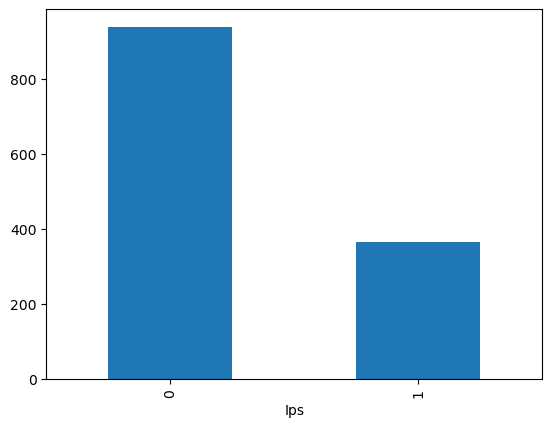

In [35]:
laptop_df['Ips'].value_counts().plot(kind='bar')

<Axes: xlabel='Ips', ylabel='Price'>

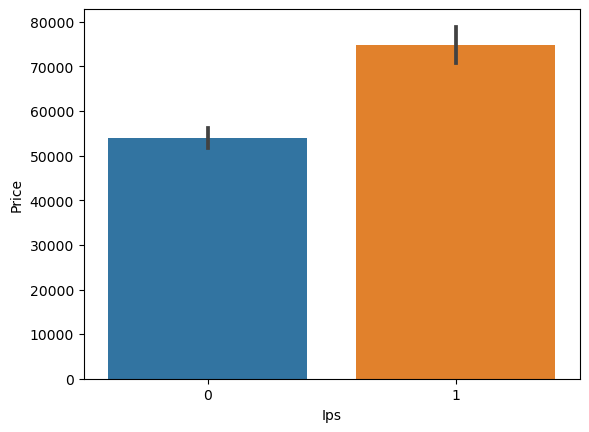

In [36]:
sns.barplot(x=laptop_df['Ips'],y=laptop_df['Price'])

In [37]:
# Now find out the X resolution and then y resolution from the column Screenresolution
temp_df = laptop_df['ScreenResolution'].apply(lambda x : x.split()[-1])

In [38]:
laptop_df['X_resolution'] = temp_df.apply(lambda x : x.split('x')[0])

In [39]:
laptop_df['X_resolution']

0       2560
1       1440
2       1920
3       2880
4       2560
        ... 
1298    1920
1299    3200
1300    1366
1301    1366
1302    1366
Name: X_resolution, Length: 1303, dtype: object

In [40]:
laptop_df['Y_resolution'] = temp_df.apply(lambda x : x.split('x')[-1])

In [41]:
laptop_df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_resolution,Y_resolution
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0,1,2560,1600


In [42]:
laptop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_resolution      1303 non-null   object 
 14  Y_resolution      1303 non-null   object 
dtypes: float64(2), int64(2), object(11)
memory usage: 152.8+ KB


In [43]:
# Need to convert X_resolution and Y_resolution data type as int
laptop_df['X_resolution'] = laptop_df['X_resolution'].astype(int)
laptop_df['Y_resolution'] = laptop_df['Y_resolution'].astype(int)

In [44]:
laptop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_resolution      1303 non-null   int32  
 14  Y_resolution      1303 non-null   int32  
dtypes: float64(2), int32(2), int64(2), object(9)
memory usage: 142.6+ KB


In [45]:
laptop_df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price', 'Touchscreen', 'Ips',
       'X_resolution', 'Y_resolution'],
      dtype='object')

In [46]:
# Pixel per inches
laptop_df['Ppi'] = (((laptop_df['X_resolution']**2) + (laptop_df['Y_resolution']**2))**0.5/laptop_df['Inches']).astype('float')

In [47]:
laptop_df.drop(columns='ScreenResolution',axis=1,inplace=True)

In [48]:
# laptop_df.corr()['Price']
# We found that the correlation with X_resolution and Y_resolution is not good so we are removing the X_resolution and Y_resolution
laptop_df.drop(columns=['X_resolution','Y_resolution'],inplace=True)

In [49]:
laptop_df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,Ppi
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,1,226.983005
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,127.677940
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,141.211998
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0,1,220.534624
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0,1,226.983005


#### Cpu

In [50]:
laptop_df['Cpu'].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

In [51]:
laptop_df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [52]:
# We are considering the cpu brands intel and AMD
laptop_df['CpuName'] = laptop_df['Cpu'].apply(lambda x : " ".join(x.split()[0:3]))

In [53]:
laptop_df['CpuName']

0            Intel Core i5
1            Intel Core i5
2            Intel Core i5
3            Intel Core i7
4            Intel Core i5
               ...        
1298         Intel Core i7
1299         Intel Core i7
1300    Intel Celeron Dual
1301         Intel Core i7
1302    Intel Celeron Dual
Name: CpuName, Length: 1303, dtype: object

In [54]:
def check_cpu_brand(text):
    if text =="Intel Core i3" or text =="Intel Core i5" or text =="Intel Core i7":
        return text
    else:
        if text.split()[0] == "Intel":
             return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [55]:
laptop_df['CpuBrand'] = laptop_df['CpuName'].apply(check_cpu_brand)

In [56]:
laptop_df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,Ppi,CpuName,CpuBrand
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


<Axes: xlabel='CpuBrand'>

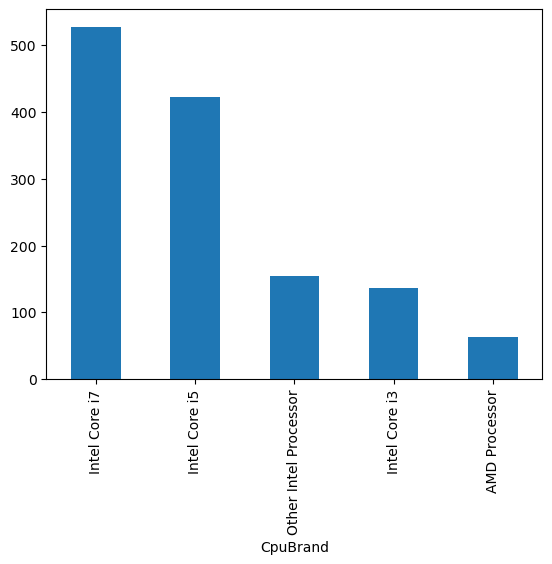

In [57]:
laptop_df['CpuBrand'].value_counts().plot(kind='bar')

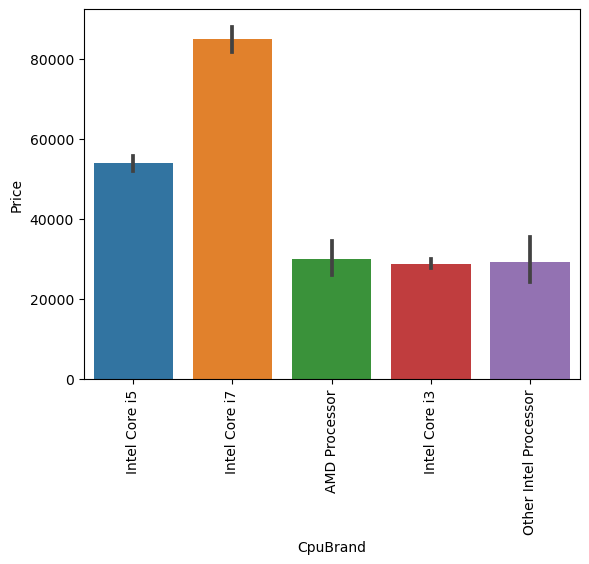

In [58]:
# Create a bar plot showing the average price of laptops for each CPU brand using seaborn
# The x-axis represents different CPU brands, and the y-axis represents the average price of laptops with those brands
sns.barplot(x=laptop_df['CpuBrand'], y=laptop_df['Price'])

# Rotate the x-axis labels by 90 degrees for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()

In [59]:
laptop_df.drop(columns=['Cpu','CpuName'],axis=1,inplace=True)

In [60]:
laptop_df.head()

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,Ppi,CpuBrand
0,Apple,Ultrabook,13.3,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,13.3,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,15.6,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,15.4,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,13.3,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0,1,226.983005,Intel Core i5


#### Ram

In [61]:
laptop_df['Ram'] = laptop_df['Ram'].str.replace('GB',"")

In [62]:
laptop_df['Ram'] = laptop_df['Ram'].astype(int)

In [63]:
laptop_df.head()

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,Ppi,CpuBrand
0,Apple,Ultrabook,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,15.6,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,15.4,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,13.3,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0,1,226.983005,Intel Core i5


<Axes: xlabel='Ram'>

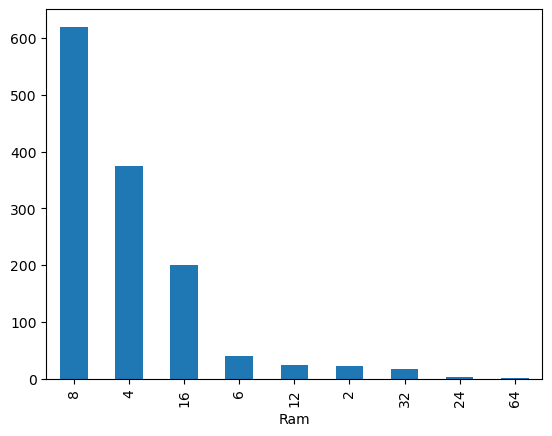

In [64]:
laptop_df['Ram'].value_counts().plot(kind='bar')

<Axes: xlabel='Ram', ylabel='Price'>

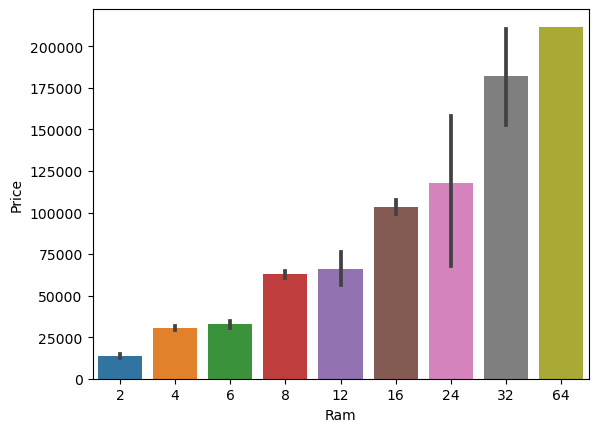

In [65]:
sns.barplot(x = laptop_df['Ram'], y = laptop_df['Price'])

In [66]:
laptop_df.columns

Index(['Company', 'TypeName', 'Inches', 'Ram', 'Memory', 'Gpu', 'OpSys',
       'Weight', 'Price', 'Touchscreen', 'Ips', 'Ppi', 'CpuBrand'],
      dtype='object')

#### Memory

In [67]:
laptop_df['Memory'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [68]:
laptop_df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [69]:
# We are going to create four separate columns from memory columns
# and columns are HDD SDD Hybrid and Flash Storage
# Initialize new columns with 0
laptop_df['HDD'] = 0
laptop_df['SSD'] = 0
laptop_df['FlashStorage'] = 0
laptop_df['Hybrid'] = 0

# Function to parse and assign values
def parse_memory(memory_str):
    # Initialize values
    hdd_value = 0
    ssd_value = 0
    flash_memory_value = 0
    hybrid_value = 0
    
    # Find HDD sizes
    hdd_matches = re.findall(r'(\d+)(TB|GB) HDD', memory_str)
    for match in hdd_matches:
        size, unit = match
        size = int(size) * 1024 if unit == 'TB' else int(size)
        hdd_value += size
    
    # Find SSD sizes
    ssd_matches = re.findall(r'(\d+)(TB|GB) SSD', memory_str)
    for match in ssd_matches:
        size, unit = match
        size = int(size) * 1024 if unit == 'TB' else int(size)
        ssd_value += size
    
    # Find FlashMemory sizes
    flash_memory_matches = re.findall(r'(\d+)(TB|GB) Flash Storage', memory_str)
    for match in flash_memory_matches:
        size, unit = match
        size = int(size) * 1024 if unit == 'TB' else int(size)
        flash_memory_value += size
    
    # Check for Hybrid memory
    hybrid_matches = re.findall(r'(\d+)(TB|GB) Hybrid', memory_str)
    for match in hybrid_matches:
        size, unit = match
        size = int(size) * 1024 if unit == 'TB' else int(size)
        hybrid_value += size

    # Assign values to the DataFrame
    laptop_df.loc[laptop_df['Memory'] == memory_str, 'HDD'] = hdd_value
    laptop_df.loc[laptop_df['Memory'] == memory_str, 'SSD'] = ssd_value
    laptop_df.loc[laptop_df['Memory'] == memory_str, 'FlashStorage'] = flash_memory_value
    laptop_df.loc[laptop_df['Memory'] == memory_str, 'Hybrid'] = hybrid_value


In [70]:
laptop_df['Memory'].apply(parse_memory)

0       None
1       None
2       None
3       None
4       None
        ... 
1298    None
1299    None
1300    None
1301    None
1302    None
Name: Memory, Length: 1303, dtype: object

In [71]:
laptop_df.sample()

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,Ppi,CpuBrand,HDD,SSD,FlashStorage,Hybrid
278,Lenovo,Notebook,17.3,4,1TB HDD,Intel HD Graphics 520,Windows 10,2.8kg,26053.92,0,0,106.113062,Intel Core i3,1024,0,0,0


In [72]:
laptop_df.drop(columns=['Memory'],inplace=True)

In [73]:
laptop_df.head()

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,Ppi,CpuBrand,HDD,SSD,FlashStorage,Hybrid
0,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,127.677940,Intel Core i5,0,0,128,0
2,HP,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [74]:
laptop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company       1303 non-null   object 
 1   TypeName      1303 non-null   object 
 2   Inches        1303 non-null   float64
 3   Ram           1303 non-null   int32  
 4   Gpu           1303 non-null   object 
 5   OpSys         1303 non-null   object 
 6   Weight        1303 non-null   object 
 7   Price         1303 non-null   float64
 8   Touchscreen   1303 non-null   int64  
 9   Ips           1303 non-null   int64  
 10  Ppi           1303 non-null   float64
 11  CpuBrand      1303 non-null   object 
 12  HDD           1303 non-null   int64  
 13  SSD           1303 non-null   int64  
 14  FlashStorage  1303 non-null   int64  
 15  Hybrid        1303 non-null   int64  
dtypes: float64(3), int32(1), int64(6), object(6)
memory usage: 157.9+ KB


In [75]:
# laptop_df.corr()['Price']

In [76]:
# We are droping these columns as there in no good corellation with price
laptop_df.drop(columns=['Hybrid','FlashStorage'],inplace=True)

In [77]:
laptop_df.Price.unique()

array([ 71378.6832,  47895.5232,  30636.    , 135195.336 ,  96095.808 ,
        21312.    , 114017.6016,  61735.536 ,  79653.6   ,  41025.6   ,
        20986.992 ,  18381.0672, 130001.6016,  26581.392 ,  67260.672 ,
        80908.344 ,  39693.6   , 152274.24  ,  26586.72  ,  52161.12  ,
        10224.432 ,  53226.72  ,  13746.24  ,  43636.32  ,  35111.52  ,
        22305.1392,  58554.72  ,  42624.    ,  69157.44  ,  47738.88  ,
        13053.0672,  10602.72  ,  23389.92  ,  99580.32  ,  53173.44  ,
        13266.72  ,  19553.76  ,  26037.4032,  46833.12  ,  20725.92  ,
        79866.72  ,  27864.9072,  36336.96  ,  75604.32  ,  19660.32  ,
        69210.72  ,  34045.92  ,  24828.48  ,  16996.32  ,  44808.48  ,
        21231.5472,  58767.84  ,  20459.52  ,  40908.384 ,  31232.2032,
       130482.72  ,  22111.2   ,  31914.72  ,  50136.48  ,  36763.2   ,
       105654.24  ,  23373.4032,  12201.12  ,  29250.72  ,  50562.72  ,
        58021.92  ,  50882.4   ,  46353.6   ,  58341.6   ,  2765

#### Gpu

In [78]:
laptop_df['Gpu'].unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Intel HD Graphics 400',
       'Nvidia GeForce GTX 1050', 'AMD Radeon R2', 'AMD Radeon 530',
       'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvid

In [79]:
laptop_df['GpuBrand'] = laptop_df['Gpu'].apply(lambda x : x.split()[0])

In [80]:
laptop_df.head()

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,Ppi,CpuBrand,HDD,SSD,GpuBrand
0,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [81]:
laptop_df['GpuBrand'].value_counts()

GpuBrand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [82]:
laptop_df = laptop_df[laptop_df['GpuBrand'] != 'ARM']

<Axes: xlabel='GpuBrand', ylabel='Price'>

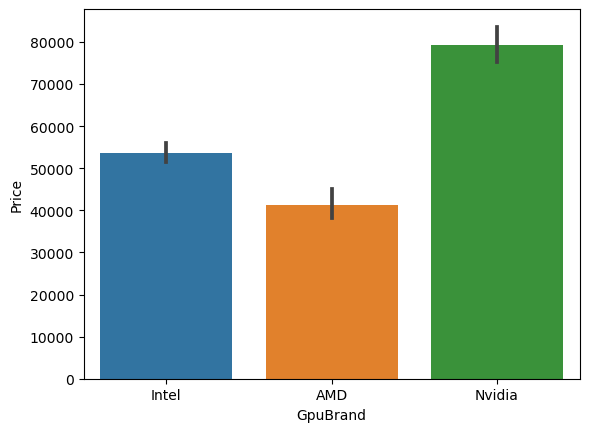

In [83]:
sns.barplot(x= laptop_df['GpuBrand'], y = laptop_df["Price"])

<Axes: xlabel='GpuBrand'>

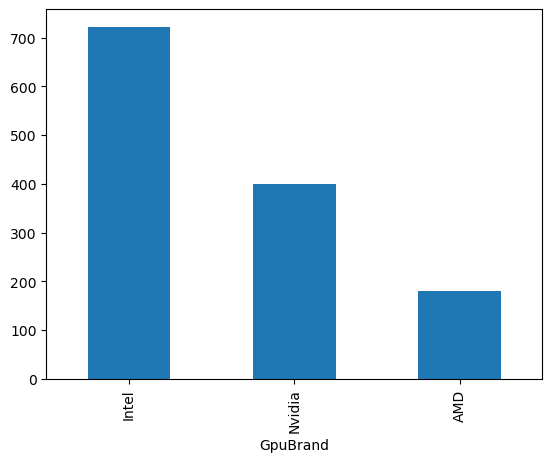

In [84]:
laptop_df['GpuBrand'].value_counts().plot(kind='bar')

In [85]:
laptop_df.drop(columns='Gpu',inplace=True)

In [86]:
laptop_df.head()

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,Touchscreen,Ips,Ppi,CpuBrand,HDD,SSD,GpuBrand
0,Apple,Ultrabook,13.3,8,macOS,1.37kg,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,13.3,8,macOS,1.34kg,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,15.6,8,No OS,1.86kg,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,15.4,16,macOS,1.83kg,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,13.3,8,macOS,1.37kg,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


#### OpSys

In [87]:
laptop_df['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [88]:
laptop_df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

<Axes: xlabel='OpSys'>

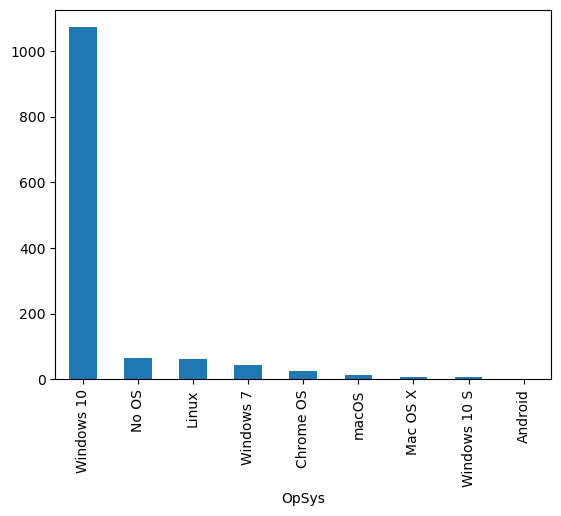

In [89]:
laptop_df['OpSys'].value_counts().plot(kind='bar')

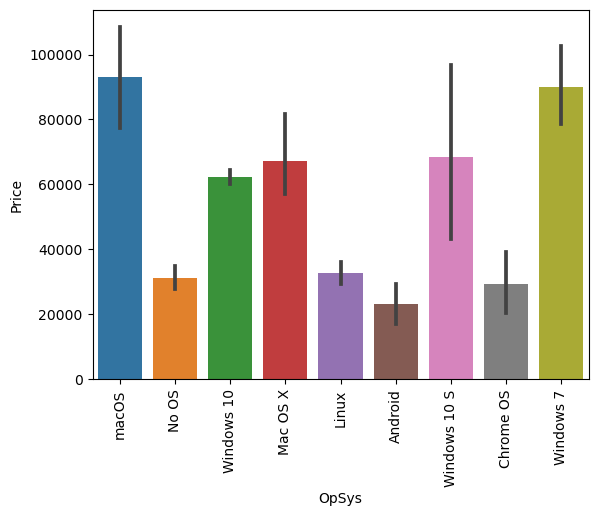

In [90]:
sns.barplot(x = laptop_df['OpSys'],y=laptop_df['Price'])
plt.xticks(rotation=90)
plt.show()

In [91]:
def check_os_system(operating_name):
    if operating_name == "Windows 10" or operating_name =="Windows 7" or operating_name =="Windows 10 S":
        return "Windows"
    elif operating_name == "macOS" or operating_name =="Mac OS X":
        return "Mac"
    elif operating_name =="Linux":
        return "Linux"
    else:
        return "Other"

In [92]:
laptop_df['OperatingSystem'] = laptop_df['OpSys'].apply(check_os_system)

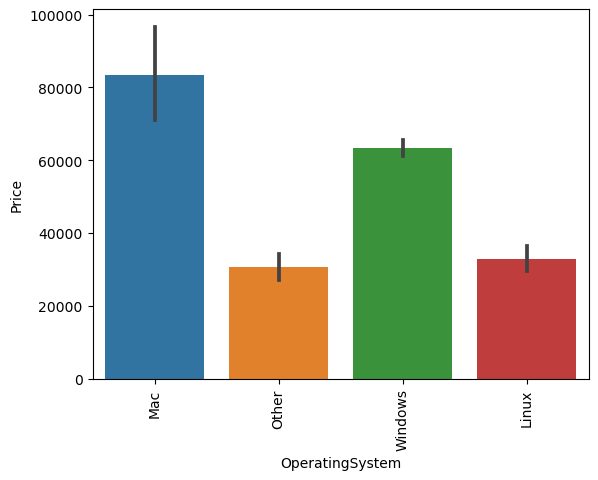

In [93]:
sns.barplot(x = laptop_df['OperatingSystem'],y=laptop_df['Price'])
plt.xticks(rotation=90)
plt.show()

In [94]:
laptop_df.head()

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,Touchscreen,Ips,Ppi,CpuBrand,HDD,SSD,GpuBrand,OperatingSystem
0,Apple,Ultrabook,13.3,8,macOS,1.37kg,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,13.3,8,macOS,1.34kg,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,15.6,8,No OS,1.86kg,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Other
3,Apple,Ultrabook,15.4,16,macOS,1.83kg,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,13.3,8,macOS,1.37kg,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [95]:
laptop_df.drop(columns='OpSys',inplace=True)

#### Weight

In [96]:
laptop_df['Weight'] = laptop_df['Weight'].str.replace("kg","")

In [97]:
laptop_df['Weight'] = laptop_df['Weight'].astype(float)

In [98]:
laptop_df['Weight'].unique()

array([1.37 , 1.34 , 1.86 , 1.83 , 2.1  , 2.04 , 1.3  , 1.6  , 2.2  ,
       0.92 , 1.22 , 0.98 , 2.5  , 1.62 , 1.91 , 2.3  , 1.35 , 1.88 ,
       1.89 , 1.65 , 2.71 , 1.2  , 1.44 , 2.8  , 2.   , 2.65 , 2.77 ,
       3.2  , 0.69 , 1.49 , 2.4  , 2.13 , 2.43 , 1.7  , 1.4  , 1.8  ,
       1.9  , 3.   , 1.252, 2.7  , 2.02 , 1.63 , 1.96 , 1.21 , 2.45 ,
       1.25 , 1.5  , 2.62 , 1.38 , 1.58 , 1.85 , 1.23 , 1.26 , 2.16 ,
       2.36 , 2.05 , 1.32 , 1.75 , 0.97 , 2.9  , 2.56 , 1.48 , 1.74 ,
       1.1  , 1.56 , 2.03 , 1.05 , 4.4  , 1.29 , 1.95 , 2.06 , 1.12 ,
       1.42 , 3.49 , 3.35 , 2.23 , 4.42 , 2.69 , 2.37 , 4.7  , 3.6  ,
       2.08 , 4.3  , 1.68 , 1.41 , 4.14 , 2.18 , 2.24 , 2.67 , 2.14 ,
       1.36 , 2.25 , 2.15 , 2.19 , 2.54 , 3.42 , 1.28 , 2.33 , 1.45 ,
       2.79 , 1.84 , 2.6  , 2.26 , 3.25 , 1.59 , 1.13 , 1.78 , 1.15 ,
       1.27 , 1.43 , 2.31 , 1.16 , 1.64 , 2.17 , 1.47 , 3.78 , 1.79 ,
       0.91 , 1.99 , 4.33 , 1.93 , 1.87 , 2.63 , 3.4  , 3.14 , 1.94 ,
       1.24 , 4.6  ,

In [99]:
laptop_df['Weight'].value_counts()

Weight
2.20    126
2.10     58
2.00     45
2.40     44
2.30     41
       ... 
4.50      1
1.14      1
3.80      1
2.26      1
2.34      1
Name: count, Length: 171, dtype: int64

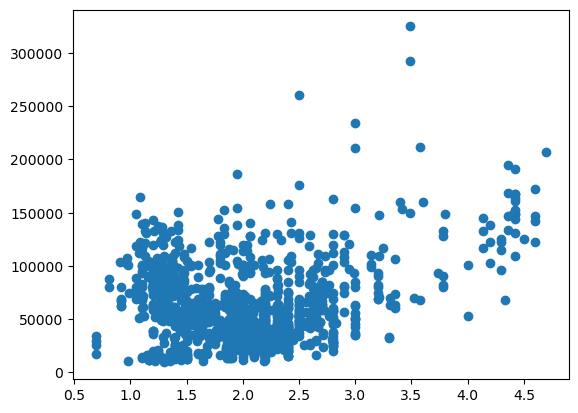

In [100]:
plt.scatter(x=laptop_df['Weight'],y=laptop_df['Price'])

<Axes: xlabel='Weight', ylabel='Density'>

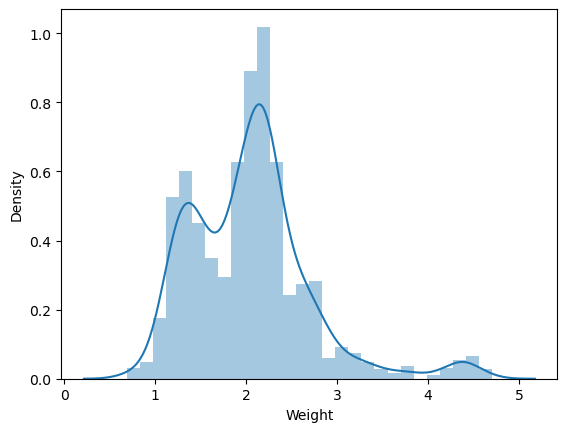

In [101]:
sns.distplot(laptop_df['Weight'])

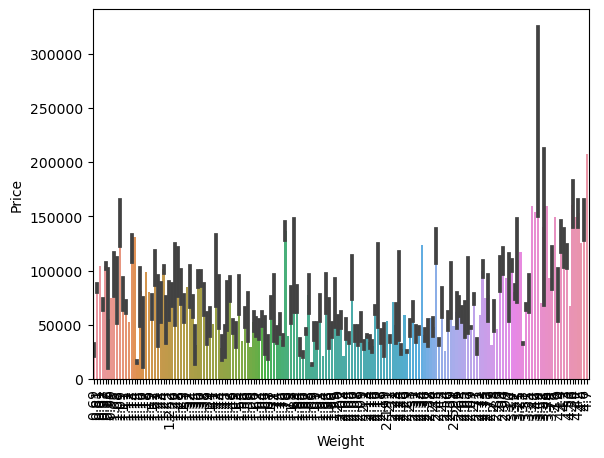

In [102]:
sns.barplot(x=laptop_df['Weight'],y=laptop_df['Price'])
plt.xticks(rotation=90)
plt.show()

In [103]:
laptop_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company          1302 non-null   object 
 1   TypeName         1302 non-null   object 
 2   Inches           1302 non-null   float64
 3   Ram              1302 non-null   int32  
 4   Weight           1302 non-null   float64
 5   Price            1302 non-null   float64
 6   Touchscreen      1302 non-null   int64  
 7   Ips              1302 non-null   int64  
 8   Ppi              1302 non-null   float64
 9   CpuBrand         1302 non-null   object 
 10  HDD              1302 non-null   int64  
 11  SSD              1302 non-null   int64  
 12  GpuBrand         1302 non-null   object 
 13  OperatingSystem  1302 non-null   object 
dtypes: float64(4), int32(1), int64(4), object(5)
memory usage: 147.5+ KB


In [104]:
X = laptop_df.drop(columns='Price',axis=1)
y = laptop_df['Price']

In [105]:
X

,Company,TypeName,Inches,Ram,Weight,Touchscreen,Ips,Ppi,CpuBrand,HDD,SSD,GpuBrand,OperatingSystem
0,Apple,Ultrabook,13.3,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,13.3,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,15.6,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Other
3,Apple,Ultrabook,15.4,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,13.3,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,13.3,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,14.0,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,15.6,6,2.19,0,0,100.454670,Intel Core i7,1024,0,AMD,Windows


In [106]:
y

0        71378.6832
1        47895.5232
2        30636.0000
3       135195.3360
4        96095.8080
           ...     
1298     33992.6400
1299     79866.7200
1300     12201.1200
1301     40705.9200
1302     19660.3200
Name: Price, Length: 1302, dtype: float64

In [107]:
# Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [108]:
ohe = OneHotEncoder()

In [109]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [110]:
ohe.fit(laptop_df[['Company', 'TypeName','CpuBrand','GpuBrand','OperatingSystem']])

OneHotEncoder()

In [111]:
laptop_df.columns

Index(['Company', 'TypeName', 'Inches', 'Ram', 'Weight', 'Price',
       'Touchscreen', 'Ips', 'Ppi', 'CpuBrand', 'HDD', 'SSD', 'GpuBrand',
       'OperatingSystem'],
      dtype='object')

In [112]:
### Column Transformer

In [113]:
column_transformer = make_column_transformer((OneHotEncoder(categories=ohe.categories),['Company', 'TypeName','CpuBrand','GpuBrand','OperatingSystem']),remainder='passthrough')

In [114]:
lr = LinearRegression()

In [115]:
pipe = make_pipeline(column_transformer,lr)

In [116]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Company', 'TypeName',
                                                   'CpuBrand', 'GpuBrand',
                                                   'OperatingSystem'])])),
                ('linearregression', LinearRegression())])

In [117]:
y_pred = pipe.predict(X_test)

In [118]:
y_pred

array([ 40646.17560261,  72475.27889526, 103832.29835248,  75944.09898239,
        32511.37851245,  67199.91968666, 179561.53483522,  71814.58905957,
        68862.49456293,  25851.88577584,  15498.03613048,  89838.42385745,
        68010.99090987,  66677.39883603,  99653.69253735,  45311.34921234,
        28952.48449498,  17500.07408902,  70803.05144685,  39582.43907173,
        30488.15796736,  62371.38926666,  31983.56500475,  45130.6723918 ,
        39725.32466389,  67145.55429944, 102994.31996949,  40802.84882534,
        25853.91863817, 122534.25125826,  32511.37851245, 236639.46757035,
        31142.65214222,  73240.41072677,  69510.73242213,  15569.43607768,
        79500.69331076,  62241.39172351,  89940.21250833,  25765.26602083,
        67412.7489755 ,  39521.10548586,  31123.85457914,  23964.10162905,
       151240.95079114,  73641.13830818,  99127.41664375,  26428.50328169,
        31008.93128392,  89508.54457569,  60714.19189384,  39536.47665581,
       162746.88115108, 1

In [119]:
r2_score(y_test,y_pred)

0.7546940734272753

In [120]:
#### One more pipeline method

In [121]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,8,11,12]) # X column indices for OHE
],remainder='passthrough')

step2 = LinearRegression()

pipe1 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe1.fit(X_train,y_train)

y_pred = pipe1.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7541809605517472
MAE 13164.27939311137


In [122]:
#### Tried with all regressor models

In [123]:
column_transformer = make_column_transformer((OneHotEncoder(categories=ohe.categories_),['Company', 'TypeName','CpuBrand','GpuBrand','OperatingSystem']),remainder='passthrough')

# List of models to evaluate
models = [
    ("Linear Regression", LinearRegression()),
    ("KNeighbors Regressor", KNeighborsRegressor(n_neighbors=3)),
    ("Lasso", Lasso()),
    ("Ridge", Ridge()),
    ("SVR", SVR(kernel='rbf',C=10000,epsilon=0.1)),
    ("Decision Tree Regressor", DecisionTreeRegressor(max_depth=10)),
    ("Random Forest Regressor", RandomForestRegressor(n_estimators=100,
                                                      random_state=3,
                                                      max_samples=0.5,
                                                      max_features=0.75,
                                                      max_depth=15)),
    ("Extra Trees Regressor", ExtraTreesRegressor(n_estimators=100,
                                                  random_state=3,
                                                  max_samples=0.5,
                                                  max_features=0.75,
                                                  bootstrap=True,
                                                  max_depth=15)),
    ("AdaBoost Regressor", AdaBoostRegressor(n_estimators=15,learning_rate=1.0)),
    ("XGBRegressor", XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)),
    ("GradientBoostingRegressor", GradientBoostingRegressor(n_estimators=500)),
    ("CatBoostRegressor", CatBoostRegressor(silent=True))  # 'silent=True' to suppress output
]

# Iterate over models, fit them, and evaluate
results = []

for name, model in models:
    pipe = make_pipeline(column_transformer, model)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    results.append((name, r2, mae))
   

# Display results
for name, score,mae in results:
    print(f"{name}: R² score = {score:.4f} : MAE = {mae:.4f}")

Linear Regression: R² score = 0.7547 : MAE = 13137.6001
KNeighbors Regressor: R² score = 0.6176 : MAE = 13785.3780
Lasso: R² score = 0.7544 : MAE = 13155.1306
Ridge: R² score = 0.7430 : MAE = 13264.3080
SVR: R² score = 0.4551 : MAE = 17900.3068
Decision Tree Regressor: R² score = 0.8007 : MAE = 11224.9479
Random Forest Regressor: R² score = 0.7971 : MAE = 10660.7781
Extra Trees Regressor: R² score = 0.7847 : MAE = 10788.8030
AdaBoost Regressor: R² score = 0.6836 : MAE = 16693.0815
XGBRegressor: R² score = 0.8281 : MAE = 9987.5127
GradientBoostingRegressor: R² score = 0.8149 : MAE = 10266.3222
CatBoostRegressor: R² score = 0.8581 : MAE = 9419.4024


In [124]:
#### Tried with all regressor models without hyper parameters

In [125]:

column_transformer = make_column_transformer((OneHotEncoder(categories=ohe.categories_),['Company', 'TypeName','CpuBrand','GpuBrand','OperatingSystem']),remainder='passthrough')

# List of models to evaluate
models = [
    ("Linear Regression", LinearRegression()),
    ("KNeighbors Regressor", KNeighborsRegressor(n_neighbors=3)),
    ("Lasso", Lasso()),
    ("Ridge", Ridge()),
    ("SVR", SVR()),
    ("Decision Tree Regressor", DecisionTreeRegressor()),
    ("Random Forest Regressor", RandomForestRegressor()),
    ("Extra Trees Regressor", ExtraTreesRegressor()),
    ("AdaBoost Regressor", AdaBoostRegressor()),
    ("XGBRegressor", XGBRegressor()),
    ("GradientBoostingRegressor", GradientBoostingRegressor()),
    ("CatBoostRegressor", CatBoostRegressor(silent=True))  # 'silent=True' to suppress output
]

# Iterate over models, fit them, and evaluate
results = []

for name, model in models:
    pipe = make_pipeline(column_transformer, model)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    results.append((name, r2, mae))
   

# Display results
for name, score,mae in results:
    print(f"{name}: R² score = {score:.4f} : MAE = {mae:.4f}")

Linear Regression: R² score = 0.7547 : MAE = 13137.6001
KNeighbors Regressor: R² score = 0.6176 : MAE = 13785.3780
Lasso: R² score = 0.7544 : MAE = 13155.1306
Ridge: R² score = 0.7430 : MAE = 13264.3080
SVR: R² score = -0.0251 : MAE = 27144.4597
Decision Tree Regressor: R² score = 0.8074 : MAE = 10681.2576
Random Forest Regressor: R² score = 0.8300 : MAE = 9975.5219
Extra Trees Regressor: R² score = 0.8127 : MAE = 10255.8900
AdaBoost Regressor: R² score = 0.5556 : MAE = 21519.4104
XGBRegressor: R² score = 0.8475 : MAE = 9542.1755
GradientBoostingRegressor: R² score = 0.8146 : MAE = 11249.6148
CatBoostRegressor: R² score = 0.8581 : MAE = 9419.4024


### Voting Regressor

In [126]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,8,11,12]) # X column indices for OHE
],remainder='passthrough')

rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=10,bootstrap=True)

step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)],weights=[5,1,1,1])


pipe1 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe1.fit(X_train,y_train)

y_pred = pipe1.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8154569745537869
MAE 10514.04665751301


### Stacking

In [127]:
# One more pipeline method
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,8,11,12]) # X column indices for OHE
],remainder='passthrough')

estimators = [
    ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    ('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))


pipe1 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe1.fit(X_train,y_train)

y_pred = pipe1.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8312322619137568
MAE 10464.811083299837
